## Statsmodels Library

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download Bitcoin historical price data
btc_data = yf.download("BTC-USD", 
                       start="2023-01-01", 
                       end="2030-12-31", 
                       progress=False)

# Keep only Open, High, Low, and Close prices
btc_data = btc_data[['Open', 'High', 'Low', 'Close']]

# View data structure
btc_data.info()

# Ensure df has a flat column structure
if isinstance(btc_data.columns, pd.MultiIndex):
    btc_data.columns = btc_data.columns.get_level_values(0)  # Flatten MultiIndex if present
elif not btc_data.columns.is_unique:
    raise ValueError("DataFrame has duplicate columns, which is unexpected.")

# View data structure
btc_data.info()    

C:\Users\user\AppData\Local\Temp\ipykernel_19952\717898374.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download("BTC-USD",


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2023-01-01 to 2025-08-28
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Open, BTC-USD)   971 non-null    float64
 1   (High, BTC-USD)   971 non-null    float64
 2   (Low, BTC-USD)    971 non-null    float64
 3   (Close, BTC-USD)  971 non-null    float64
dtypes: float64(4)
memory usage: 37.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2023-01-01 to 2025-08-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    971 non-null    float64
 1   High    971 non-null    float64
 2   Low     971 non-null    float64
 3   Close   971 non-null    float64
dtypes: float64(4)
memory usage: 37.9 KB


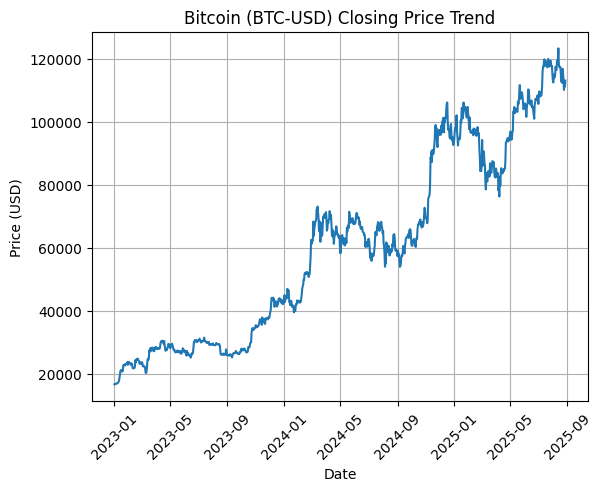

In [5]:
import matplotlib.pyplot as plt
# Plot Bitcoin closing price trend
plt.plot(btc_data.index, btc_data['Close'])
plt.title('Bitcoin (BTC-USD) Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


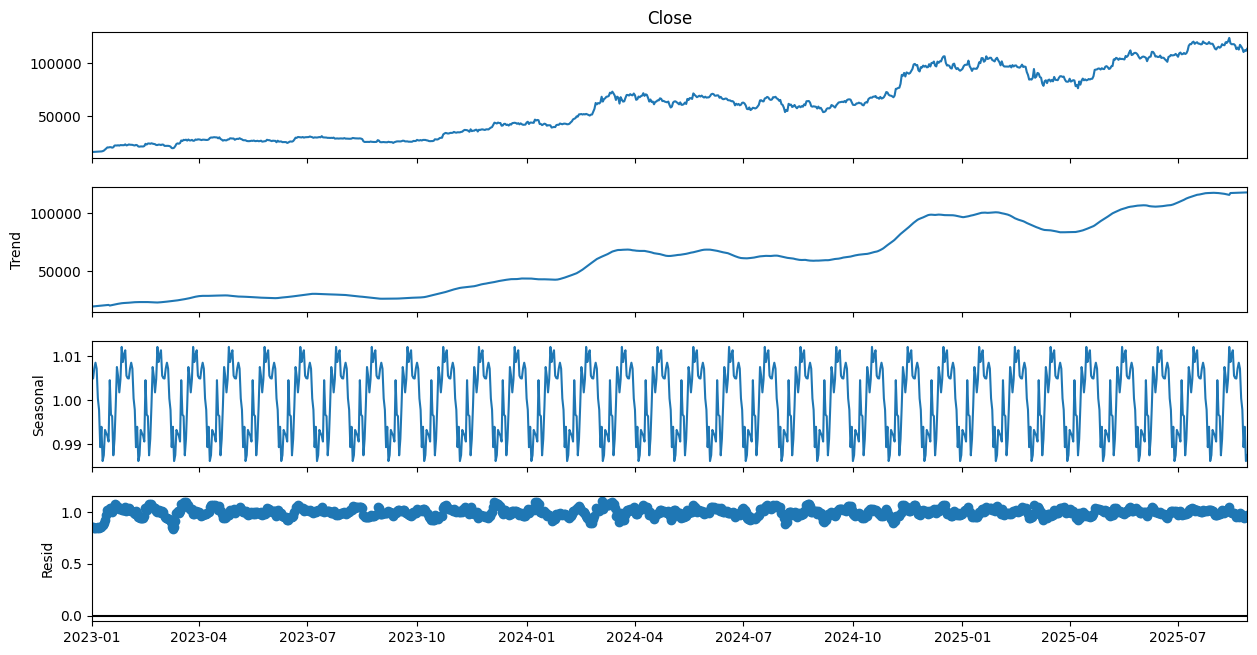

In [7]:
import statsmodels.api as sm
# Seasonal decomposition: Observe market trend and cycles
def seasonal_decompose(y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', period=30, extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()

# Perform seasonal decomposition on Bitcoin closing price
seasonal_decompose(btc_data['Close'])

In [8]:
### plot for Rolling Statistic for testing Stationarity
# Stationarity Test
def test_stationarity(timeseries):
    # Compute rolling mean and standard deviation
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot to visualize trends
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label='Original Price')
    ax.plot(rolling_mean, label='Rolling Mean')
    ax.plot(rolling_std, label='Rolling Std (x10)')
    ax.legend()
    ax.set_title('Market Price Stationarity Test')
    plt.show()

In [9]:
# ADF Test: Determine if time series is stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.2f}')

# Perform ADF test
adf_test(btc_data['Close'])

ADF Statistic: -0.4799075501431381
p-value: 0.8958781240679665
Critical Values:
   1%: -3.44
   5%: -2.86
   10%: -2.57


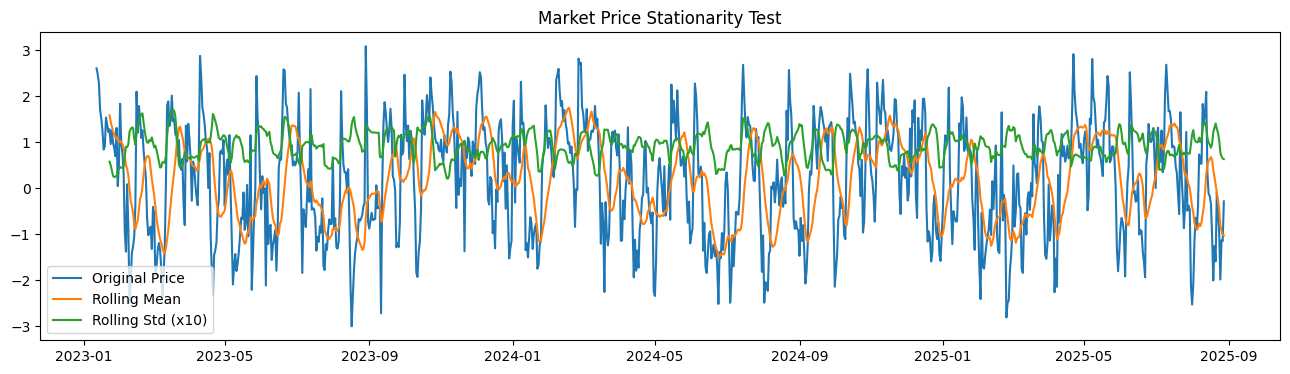

ADF Statistic: -11.093318810746698
p-value: 4.0311213306889644e-20
Critical Values:
   1%: -3.44
   5%: -2.86
   10%: -2.57


In [10]:
# Detrending: Remove trend from the series
detrended = (btc_data['Close'] - btc_data['Close'].rolling(window=12).mean()) / btc_data['Close'].rolling(window=12).std()
detrended = detrended.dropna()

# Re-test stationarity
test_stationarity(detrended)

# Re-run ADF test
adf_test(detrended)

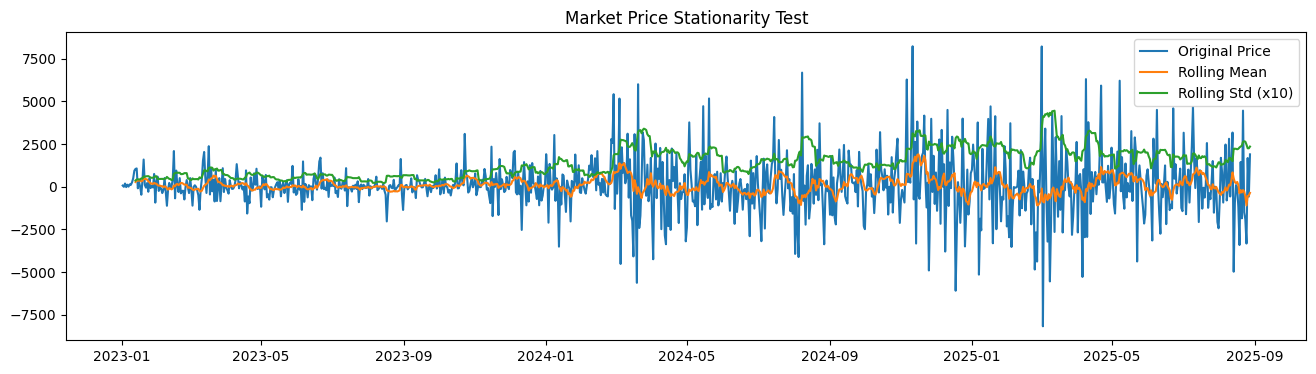

ADF Statistic: -33.84471128457292
p-value: 0.0
Critical Values:
   1%: -3.44
   5%: -2.86
   10%: -2.57


In [11]:
# Differencing: Make the series stationary
diffed = (btc_data['Close'] - btc_data['Close'].shift(1)).dropna()

# Stationarity test
test_stationarity(diffed)

# Re-run ADF test
adf_test(diffed)

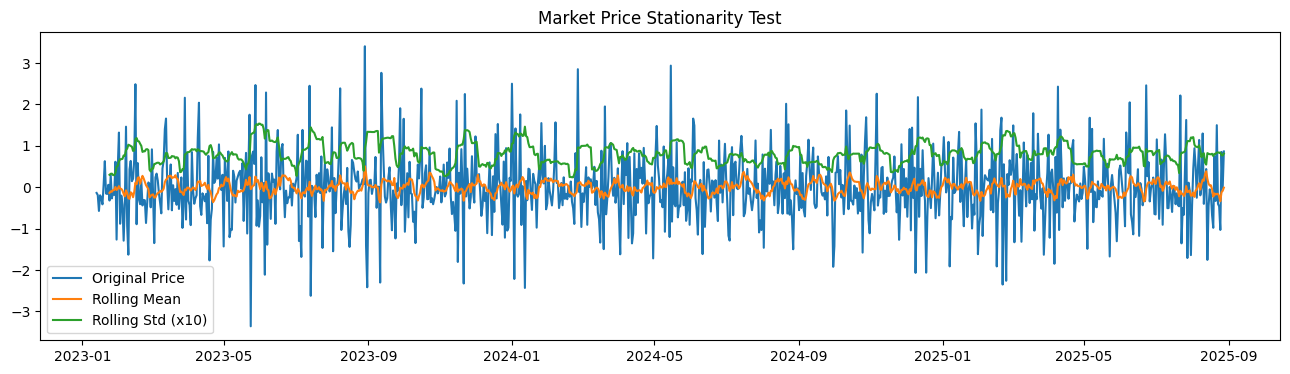

ADF Statistic: -10.890911548826164
p-value: 1.2258379216726492e-19
Critical Values:
   1%: -3.44
   5%: -2.86
   10%: -2.57


In [12]:
# Detrending + Differencing
diffed_detrended = (detrended - detrended.shift(1)).dropna()

# Stationarity test
test_stationarity(diffed_detrended)

# Re-run ADF test
adf_test(diffed_detrended)

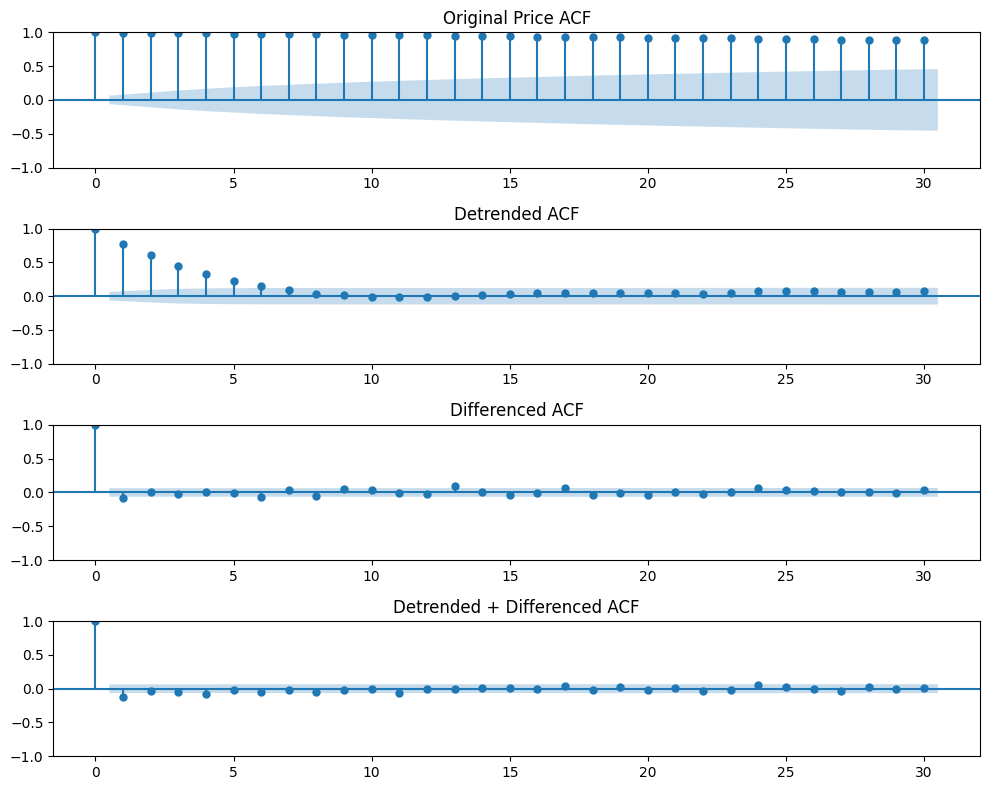

In [13]:
# Autocorrelation Function (ACF): Examine autocorrelation in price series
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 8))
plot_acf(btc_data['Close'], ax=ax1, title='Original Price ACF')
plot_acf(detrended, ax=ax2, title='Detrended ACF')
plot_acf(diffed, ax=ax3, title='Differenced ACF')
plot_acf(diffed_detrended, ax=ax4, title='Detrended + Differenced ACF')
plt.tight_layout()
plt.show()

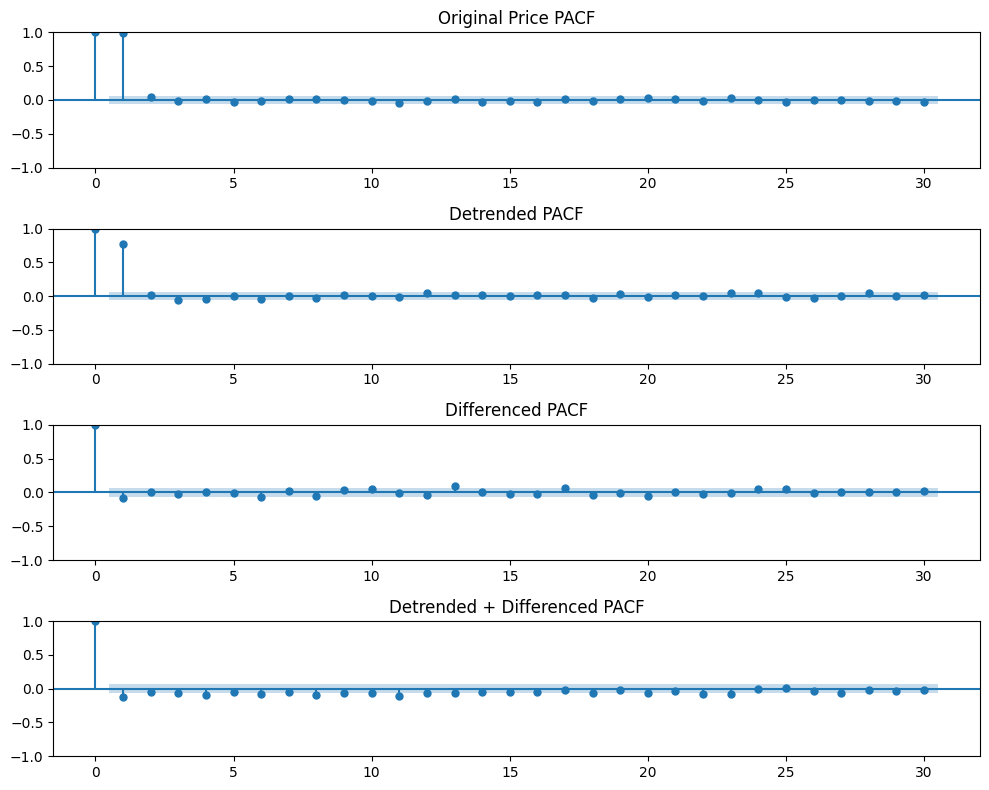

In [14]:
# Partial Autocorrelation Function (PACF): Examine partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 8))
plot_pacf(btc_data['Close'], ax=ax1, title='Original Price PACF')
plot_pacf(detrended, ax=ax2, title='Detrended PACF')
plot_pacf(diffed, ax=ax3, title='Differenced PACF')
plot_pacf(diffed_detrended, ax=ax4, title='Detrended + Differenced PACF')
plt.tight_layout()
plt.show()

### ARIMA Model

#### MA model

In [15]:
import pandas as pd

# Moving Average Model (MA Model)
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model (q=1)
ma_model = ARIMA(btc_data['Close'], order=(0, 0, 1)).fit()

# Forecast next 10 days
ma_forecast = ma_model.forecast(steps=10)

# Output forecast results
print("MA Model Forecast - Next 10 Days:")
print(ma_forecast)

# Model summary
ma_model.summary()
#ma_model.plot_diagnostics()

MA Model Forecast - Next 10 Days:
2025-08-29    100384.490305
2025-08-30     60633.983227
2025-08-31     60633.983227
2025-09-01     60633.983227
2025-09-02     60633.983227
2025-09-03     60633.983227
2025-09-04     60633.983227
2025-09-05     60633.983227
2025-09-06     60633.983227
2025-09-07     60633.983227
Freq: D, Name: predicted_mean, dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  971
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -10807.278
Date:                Thu, 28 Aug 2025   AIC                          21620.557
Time:                        19:09:06   BIC                          21635.192
Sample:                    01-01-2023   HQIC                         21626.127
                         - 08-28-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.063e+04   1155.024     52.496      0.000    5.84e+04    6.29e+04
ma.L1          0.9999      0.036     27.687      0.000       0.929       1.071
sigma2      2.956e+08      0.033   8.83e+09      0.000    2.96e+08    2.96e+08
===================================================================================
Ljung-Box (L1) (Q):                 484.45   Jarque-Bera (JB):                67.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.87e+27. Standard errors may be unstable.
"""

#### AR (Autoregressive) Model

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


AR Model Forecast - Next 10 Days:
2025-08-29    113163.190485
2025-08-30    113211.497982
2025-08-31    113259.758474
2025-09-01    113307.972007
2025-09-02    113356.138627
2025-09-03    113404.258380
2025-09-04    113452.331310
2025-09-05    113500.357464
2025-09-06    113548.336887
2025-09-07    113596.269625
Freq: D, dtype: float64


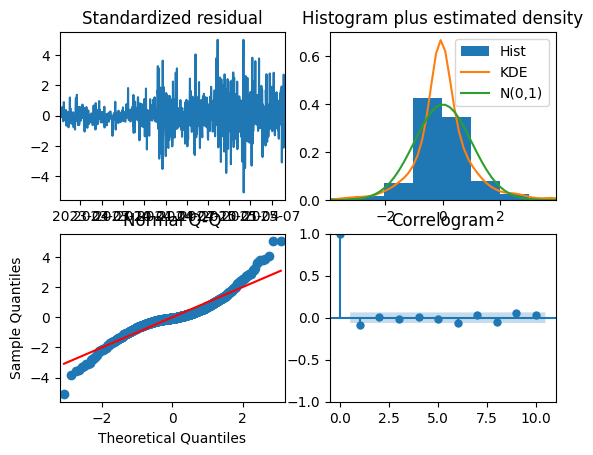

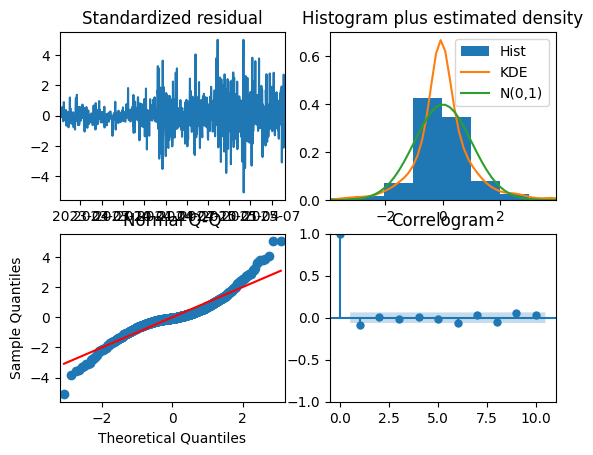

In [16]:
# Fit AR model (p=1)
ar_model = sm.tsa.AutoReg(btc_data['Close'], lags=1).fit()

# Forecast next 10 days
ar_forecast = ar_model.forecast(steps=10)

# Output forecast results
print("AR Model Forecast - Next 10 Days:")
print(ar_forecast)

# Diagnostic plots
ar_model.plot_diagnostics()

#### ARMA Model (AR + MA)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARMA Model Forecast - Next 10 Days:
2025-08-29    112912.760744
2025-08-30    112921.484406
2025-08-31    112873.886979
2025-09-01    112841.376568
2025-09-02    112804.863903
2025-09-03    112769.452024
2025-09-04    112733.776734
2025-09-05    112698.202697
2025-09-06    112662.632407
2025-09-07    112627.091910
Freq: D, Name: predicted_mean, dtype: float64


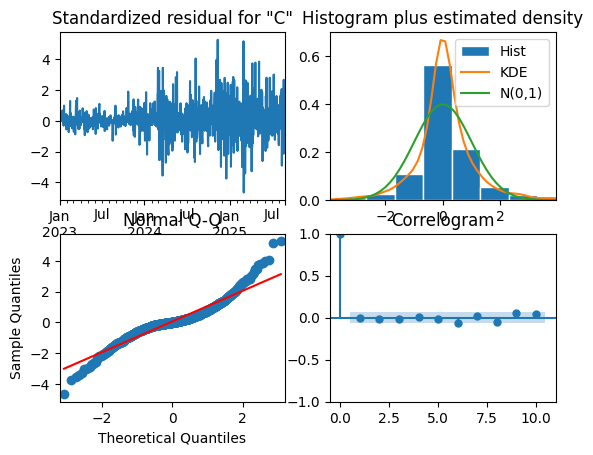

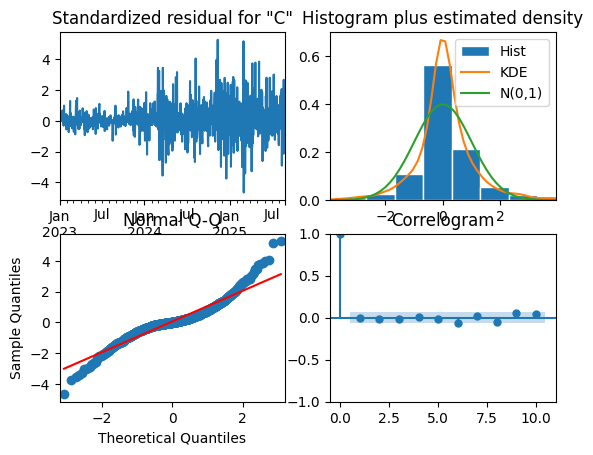

In [17]:
# Fit ARMA model (p=2, q=1)
arma_model = ARIMA(btc_data['Close'], order=(2, 0, 1)).fit()

# Forecast next 10 days
arma_forecast = arma_model.get_forecast(steps=10)

# Output forecast results
print("ARMA Model Forecast - Next 10 Days:")
print(arma_forecast.predicted_mean)

# Diagnostic plots
arma_model.plot_diagnostics()

#### ARIMA Model (AR + MA + I)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA Model Forecast - Next 10 Days:
2025-08-29    112961.785022
2025-08-30    112997.344338
2025-08-31    112989.082611
2025-09-01    112991.002112
2025-09-02    112990.556141
2025-09-03    112990.659757
2025-09-04    112990.635683
2025-09-05    112990.641276
2025-09-06    112990.639977
2025-09-07    112990.640279
Freq: D, Name: predicted_mean, dtype: float64


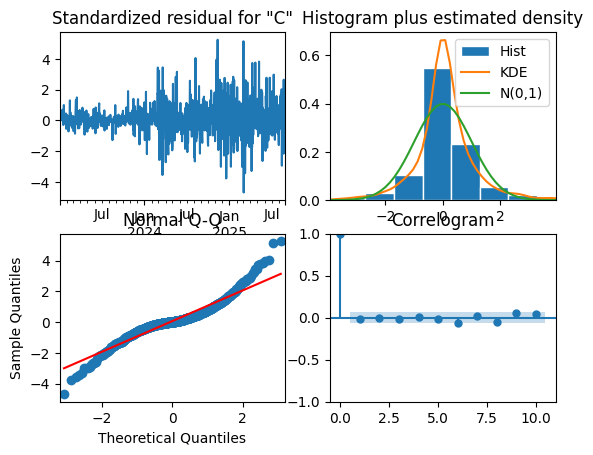

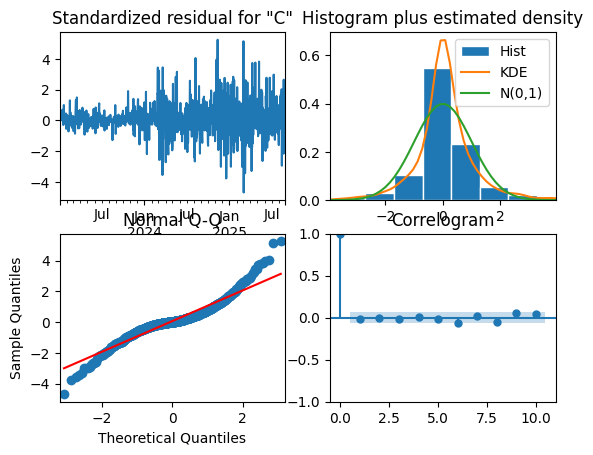

In [18]:
# Fit ARIMA model (p=1, d=1, q=1)
arima_model = ARIMA(btc_data['Close'], order=(1, 1, 1)).fit()

# Forecast next 10 days
arima_forecast = arima_model.get_forecast(steps=10)

# Output forecast results
print("ARIMA Model Forecast - Next 10 Days:")
print(arima_forecast.predicted_mean)

# Diagnostic plots
arima_model.plot_diagnostics()

#### Visualizing Forecast Results

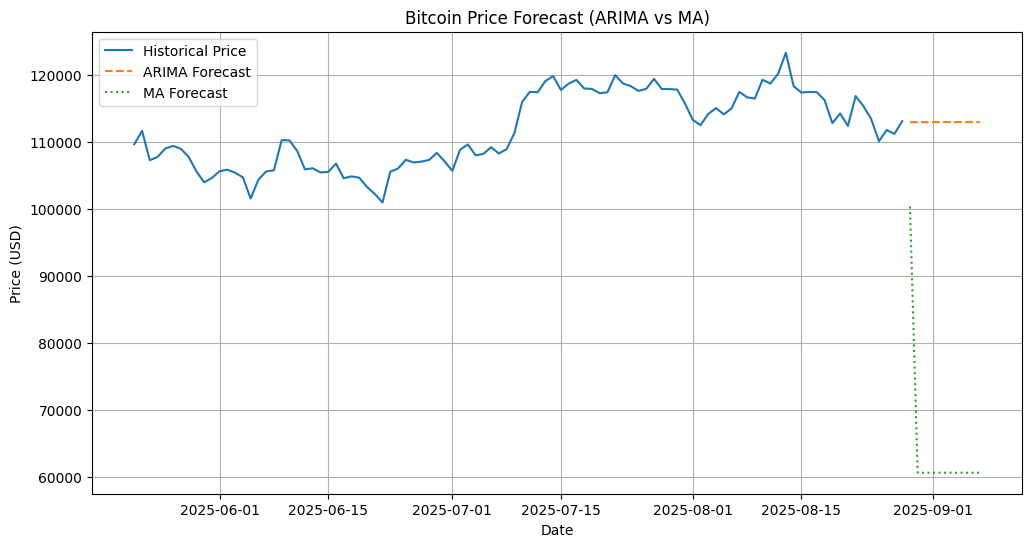

In [19]:
# Add forecast results to a new DataFrame
forecast_index = pd.date_range(start=btc_data.index[-1], periods=11, freq='D')[1:]
forecast_df = pd.DataFrame({
    'ARIMA Forecast': arima_forecast.predicted_mean,
    'MA Forecast': ma_forecast
}, index=forecast_index)

# Plot forecast results
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Close'][-100:], label='Historical Price')
plt.plot(forecast_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--')
plt.plot(forecast_df['MA Forecast'], label='MA Forecast', linestyle=':')
plt.title('Bitcoin Price Forecast (ARIMA vs MA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#### Model Evaluation Metrics (e.g., RMSE, MAE)

In [20]:
# Simulate in-sample predictions for validation
arima_insample = arima_model.predict(start=100, end=150)

# Actual values
actual = btc_data['Close'][100:151]

# Calculate errors
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(actual, arima_insample))
mae = mean_absolute_error(actual, arima_insample)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 547.30
MAE: 408.50


#### Model Comparison and Selection Recommendations

If you have multiple models, compare their forecasting performance:
 - ARIMA: Suitable for data with trends
 - MA: Suitable for short-term fluctuations
 - AR: Suitable for prices with autocorrelation
 - ARMA: Suitable for stationary price series

 Recommendations:
 - If market volatility is high: Use ARIMA
 - If no clear trend: Use MA
 - If market shows cyclical patterns: Use AR or ARMA

In [21]:
# You can further use AIC/BIC to select the best model:
print("ARIMA AIC:", arima_model.aic)
print("ARIMA BIC:", arima_model.bic)

ARIMA AIC: 17093.20573119649
ARIMA BIC: 17107.83761941098


## Aditional Information

#### Pair trading strategy

The **pairs trading strategy** is a **market-neutral trading strategy** that involves simultaneously placing two positions in related securities to exploit short-term price divergences. 

1. **Finding two cointegrated stocks** — stocks whose prices historically move together.
2. **Going long on the underperformer** and **short on the outperformer** when their price ratio deviates from the historical average.
3. **Closing the position** when the prices converge again.

Considering two imaginary financial instruments, Company A and Company B, whose prices diverge over a specified period. By taking a long position in the underpriced security (Company B) and a short position in the overpriced security (Company A), you can capitalize on the price convergence.

###### Key Concepts:

- **Cointegration**: The spread between two stock prices is stationary (i.e., it reverts to a mean).
- **Mean Reversion**: Prices tend to return to their historical relationship.
- **Hedge Ratio**: How many shares of each stock to trade (often derived via regression).
- **Z-Score**: Normalized measure of how far the current spread is from the mean.

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
plt.style.use('seaborn-v0_8')  # Updated for newer matplotlib versions

# Define tickers
tickers = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
data = yf.download(tickers, start="2020-01-01", end="2024-12-31")['Close']

# Drop any missing values
data = data.dropna()

print("Data shape:", data.shape)
print(data.tail())

C:\Users\user\AppData\Local\Temp\ipykernel_19952\2692834055.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  5 of 5 completed

Data shape: (1257, 5)
Ticker            AAPL        AMZN        GOOG        META        NFLX
Date                                                                  
2024-12-23  254.367020  225.059998  195.531937  598.856018  911.450012
2024-12-24  257.286682  229.050003  197.108261  606.742920  932.119995
2024-12-26  258.103729  227.050003  196.639359  602.350220  924.140015
2024-12-27  254.685867  223.750000  193.586487  598.816040  907.549988
2024-12-30  251.307877  221.300003  192.239655  590.260254  900.429993


**Cointegration** is a critical aspect of this pairs trading strategy, ensuring a long-term relationship between the two variables. Therefore, the next step is to loop through the different combinations of pairs to test if they’re co-integrated. This function loops through a list of securities and tests for cointegration between all pairs. It returns a cointegration test score matrix, a p-value matrix, and any pairs for which the p-value was less than 0.05.

In [25]:
from statsmodels.tsa.stattools import adfuller, coint
def find_cointegrated_pairs(data):
    n = data.shape[1]
    tickers = data.columns
    p_value_matrix = np.ones((n, n))
    pairs = []

    for i in range(n):
        for j in range(i+1, n):
            # Cointegration test
            score, pvalue, _ = coint(data[tickers[i]], data[tickers[j]])
            p_value_matrix[i, j] = pvalue

            # If p-value < 0.05, likely cointegrated
            if pvalue < 0.05:
                pairs.append((tickers[i], tickers[j], pvalue))

    return p_value_matrix, pairs 

# Run cointegration test
p_values, coint_pairs = find_cointegrated_pairs(data)

# Display results
print("Cointegrated Pairs (p < 0.05):")
for pair in coint_pairs:
    print(f"{pair[0]} & {pair[1]}: p-value = {pair[2]:.4f}")    

Cointegrated Pairs (p < 0.05):


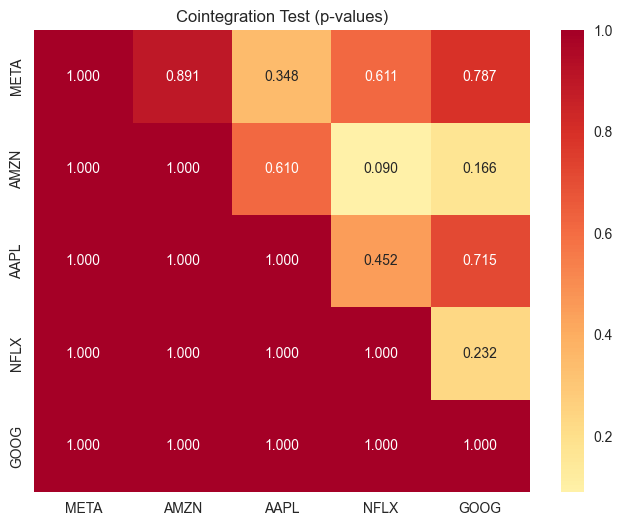

In [26]:
# Heatmap of p-values
plt.figure(figsize=(8, 6))
sns.heatmap(p_values, xticklabels=tickers, yticklabels=tickers, 
            cmap='RdYlGn_r', center=0, annot=True, fmt='.3f')
plt.title('Cointegration Test (p-values)')
plt.show()


In [27]:
# Let’s pick one strong pair — say AAPL vs GOOG
# Build Pair Trading Model: AAPL vs GOOG
# Select pair
S1 = data['AAPL']
S2 = data['GOOG']

# Step 1: Regress S1 on S2 to get hedge ratio
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
S2_const = add_constant(S2)
model = OLS(S1, S2_const).fit()
beta = model.params['GOOG']
print(f"Hedge ratio (beta): {beta:.4f}")

# Step 2: Compute spread
spread = S1 - beta * S2

Hedge ratio (beta): 1.1429


In [28]:
# Step 3: Compute z-score of spread
mean_spread = spread.rolling(window=30).mean()
std_spread = spread.rolling(window=30).std()
z_score = (spread - mean_spread) / std_spread

In [29]:
# Generate Trading Signals
# Initialize signals
z_score_threshold = 1.5
positions = pd.DataFrame(index=z_score.index)
positions['long'] = (z_score < -z_score_threshold).astype(int)   # Long AAPL, Short GOOG
positions['short'] = (z_score > z_score_threshold).astype(int)   # Short AAPL, Long GOOG

# Exit when z-score crosses back toward zero
positions['exit'] = (z_score.abs() < 0.5).astype(int)

# Forward-fill positions (hold until exit)
positions['long'] = positions['long'].replace(0, np.nan).ffill().fillna(0)
positions['short'] = positions['short'].replace(0, np.nan).ffill().fillna(0)

# Final signal: long = 1, short = -1, neutral = 0
signal = positions['long'] - positions['short']

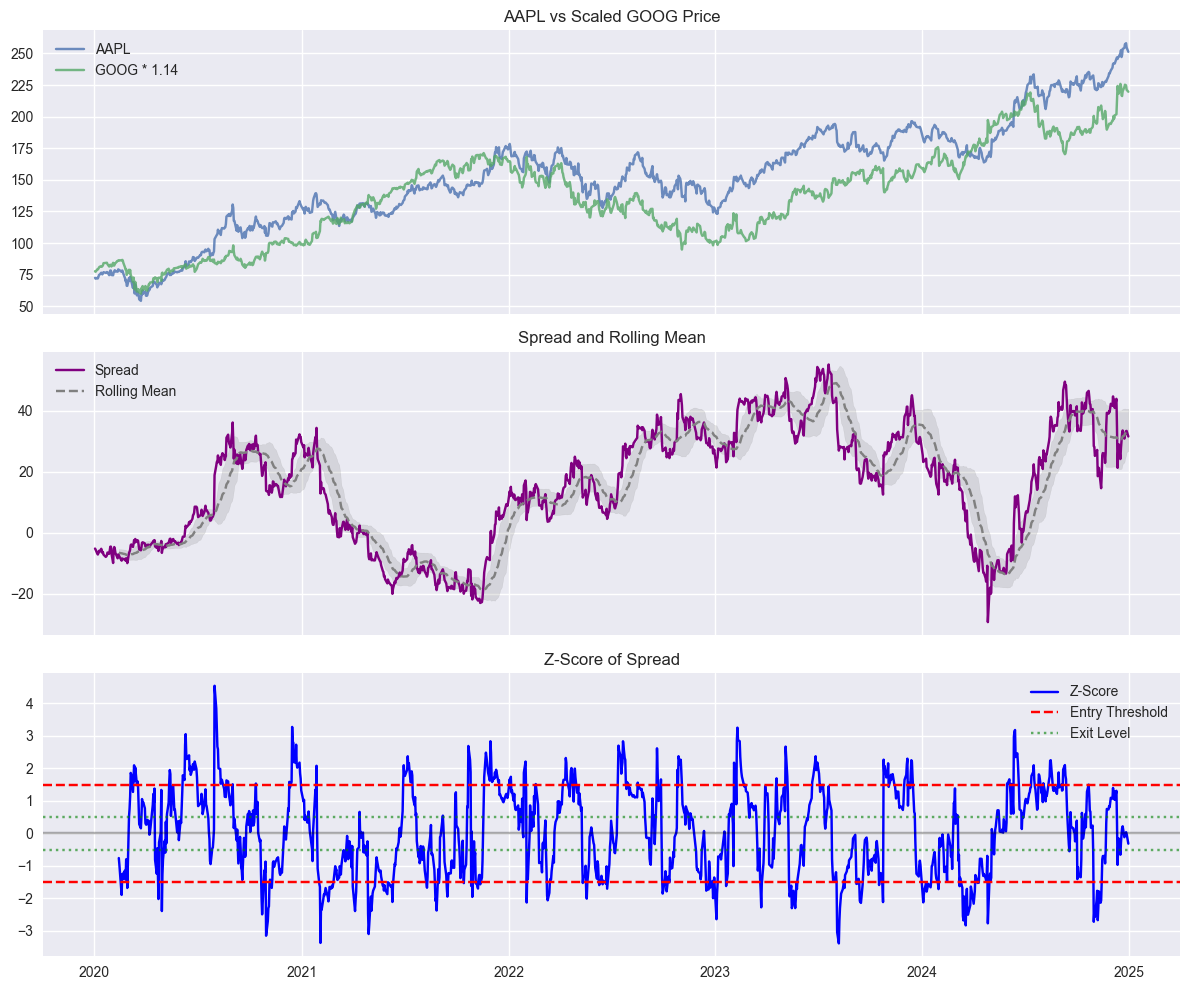

In [30]:
# Visualize Results
# Plot prices, spread, and z-score
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Top: Stock prices
axes[0].plot(S1, label='AAPL', alpha=0.8)
axes[0].plot(S2 * beta, label=f'GOOG * {beta:.2f}', alpha=0.8)  # Scaled
axes[0].set_title('AAPL vs Scaled GOOG Price')
axes[0].legend()
axes[0].grid(True)

# Middle: Spread
axes[1].plot(spread, label='Spread', color='purple')
axes[1].plot(mean_spread, label='Rolling Mean', linestyle='--', color='gray')
axes[1].fill_between(spread.index, mean_spread - std_spread, mean_spread + std_spread,
                     color='gray', alpha=0.2)
axes[1].set_title('Spread and Rolling Mean')
axes[1].legend()
axes[1].grid(True)

# Bottom: Z-score with entry/exit zones
axes[2].plot(z_score, label='Z-Score', color='blue')
axes[2].axhline(z_score_threshold, color='r', linestyle='--', label='Entry Threshold')
axes[2].axhline(-z_score_threshold, color='r', linestyle='--')
axes[2].axhline(0, color='k', linestyle='-', alpha=0.3)
axes[2].axhline(0.5, color='g', linestyle=':', alpha=0.6, label='Exit Level')
axes[2].axhline(-0.5, color='g', linestyle=':', alpha=0.6)
axes[2].set_title('Z-Score of Spread')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

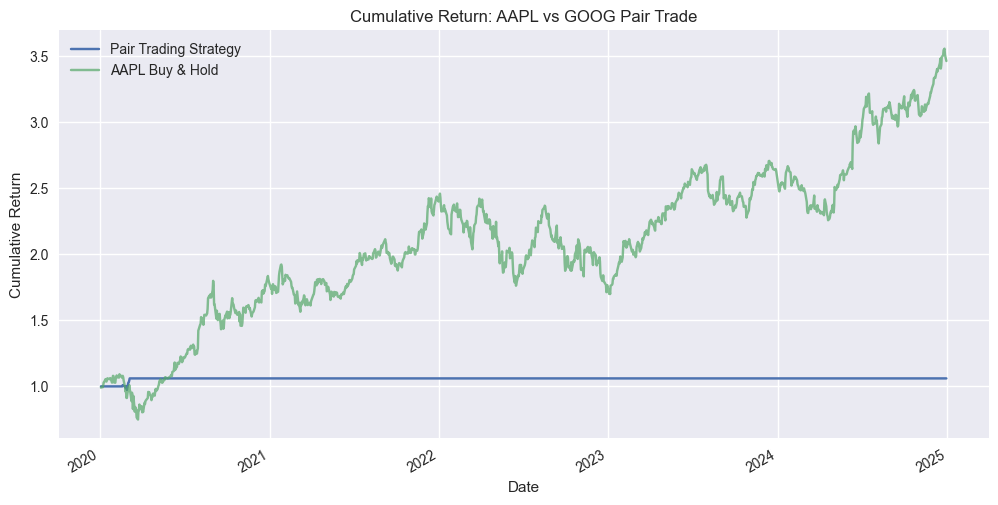

Strategy Total Return: 1.06x
Volatility (ann.): 2.96%


In [31]:
# Optional: Backtest Simple Strategy
# Daily returns of each stock
ret_aapl = S1.pct_change()
ret_goog = S2.pct_change()

# Strategy return: long AAPL + short GOOG when z < -threshold
#                  short AAPL + long GOOG when z > threshold
strategy_ret = signal.shift(1) * (ret_aapl - ret_goog)  # net return

# Cumulative return
cum_strategy = (1 + strategy_ret).cumprod()
cum_market = (1 + ret_aapl).cumprod()  # for comparison

# Plot
plt.figure(figsize=(12, 6))
cum_strategy.plot(label='Pair Trading Strategy')
cum_market.plot(label='AAPL Buy & Hold', alpha=0.7)
plt.title('Cumulative Return: AAPL vs GOOG Pair Trade')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
print(f"Strategy Total Return: {cum_strategy.iloc[-1]:.2f}x")
print(f"Volatility (ann.): {strategy_ret.std() * np.sqrt(252):.2%}")

#### Statistical Arbitrage Trading Strategy

**Statistical Arbitrage** is a quantitative, market-neutral trading strategy that exploits short-term deviations from historical price relationships among a group of related assets (e.g., stocks in the same sector). The objective is to identify pairs or groups of securities whose price movements are statistically correlated and capitalize on deviations from their historical relationship.
- It is an extension of pair trading, but instead of focusing on just two stocks, it uses a portfolio of multiple stocks to construct a mean-reverting spread.

#### Key Features:

- **Multi-stock**: Works with 3+ stocks (a "basket").
- **Mean-reverting**: Assumes prices will return to their historical average relationship.
- **Market-neutral**: Long and short positions are balanced to reduce market risk.
- **Automated & high-frequency**: Often used in algorithmic trading.
- **Driven by PCA, clustering, or factor models** to select stocks

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use('seaborn-v0_8')

#  Step 1: Download Data
# Download data
tickers = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
data = yf.download(tickers, start="2020-01-01", end="2024-12-31")['Close']
data = data.dropna()
print("Data shape:", data.shape)

C:\Users\user\AppData\Local\Temp\ipykernel_19952\2892761271.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2024-12-31")['Close']
[*********************100%***********************]  5 of 5 completed

Data shape: (1257, 5)


In [ ]:
# Step 2: Normalize Prices and Apply PCA
# We standardize the data and use PCA to find the dominant common factor (usually the market or sector trend).<---

# Normalize prices (z-score over time)
from sklearn.preprocessing import StandardScaler
returns = data.pct_change().dropna()
prices_std = StandardScaler().fit_transform(data)
prices_std_df = pd.DataFrame(prices_std, columns=data.columns, index=data.index)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)  # We only want the first principal component
pca.fit(prices_std_df)

# Transform data to get the first PC (latent factor)
pc1 = pca.transform(prices_std_df)  # Shape: (n_days, 1)

# Reconstruct the "expected" prices based on PC1
reconstructed = np.dot(pc1, pca.components_)  # Project back
reconstructed_df = pd.DataFrame(reconstructed, columns=data.columns, index=data.index)

# Compute residuals (actual - reconstructed)
residuals = prices_std_df - reconstructed_df

# Plot PCA explained variance
print(f"Explained variance by first PC: {pca.explained_variance_ratio_[0]:.1%}")

Explained variance by first PC: 78.1%


In [ ]:
# Step 3: Compute Z-Score of Residuals
# Each stock’s residual represents how much it deviates from the common trend. <----

# Compute z-scores for each stock's residuals
z_scores = residuals.rolling(window=30).apply(
    lambda x: (x[-1] - x.mean()) / x.std(), raw=True
)

# Only keep recent data
z_scores = z_scores.dropna()

In [36]:
# Step 4: Generate Trading Signals
'''
Long stocks with low z-score (underperforming, expected to rebound).
Short stocks with high z-score (outperforming, expected to revert).
Portfolio is dollar-neutral (sum of longs = sum of shorts).
'''
# Generate signals
z_threshold = 1.0

# Initialize positions
positions = pd.DataFrame(index=z_scores.index, columns=z_scores.columns)

for date in z_scores.index:
    z_row = z_scores.loc[date]
    
    # Long the most negative z-scores (undervalued)
    longs = (z_row < -z_threshold).astype(int)
    
    # Short the most positive z-scores (overvalued)
    shorts = (z_row > z_threshold).astype(int)
    
    # Normalize weights to make dollar-neutral
    total_longs = longs.sum()
    total_shorts = shorts.sum()
    
    if total_longs > 0:
        longs = longs / total_longs
    if total_shorts > 0:
        shorts = shorts / total_shorts
    
    positions.loc[date] = longs - shorts  # +1 for long, -1 for short, scaled

# Forward-fill positions (hold until signal changes)
positions = positions.fillna(method='ffill').fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_19952\1269068284.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  positions = positions.fillna(method='ffill').fillna(0)
C:\Users\user\AppData\Local\Temp\ipykernel_19952\1269068284.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  positions = positions.fillna(method='ffill').fillna(0)


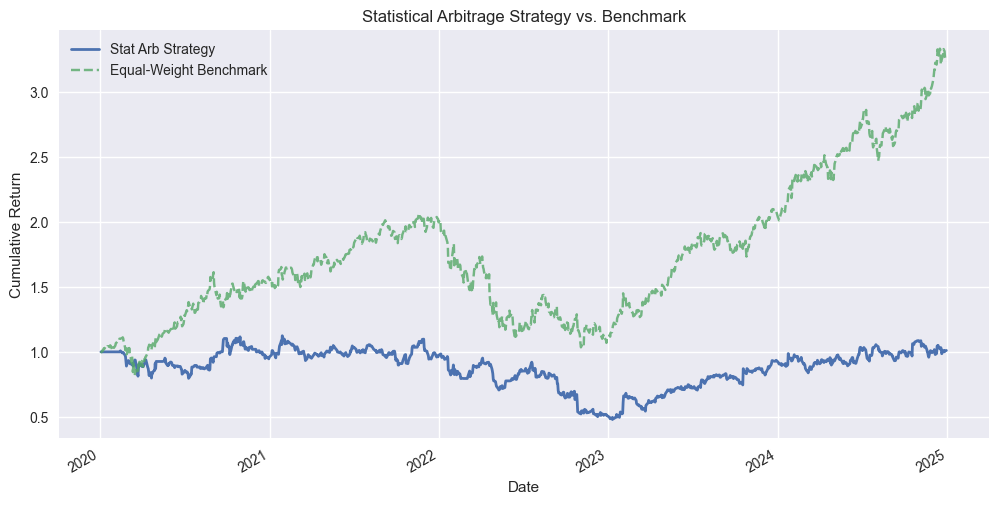

Strategy Annualized Return: 5.38%
Strategy Annualized Volatility: 32.27%
Strategy Sharpe Ratio: 0.17


In [37]:
# Step 5: Backtest the Strategy
# Daily returns
daily_returns = data.pct_change().dropna()

# Portfolio return: sum(weight * return) for each stock
portfolio_return = (positions.shift(1) * daily_returns).sum(axis=1)

# Cumulative return
cumulative_return = (1 + portfolio_return).cumprod()

# Market benchmark: equal-weighted portfolio
benchmark_return = daily_returns.mean(axis=1)
cumulative_benchmark = (1 + benchmark_return).cumprod()

# Plot results
plt.figure(figsize=(12, 6))
cumulative_return.plot(label='Stat Arb Strategy', linewidth=2)
cumulative_benchmark.plot(label='Equal-Weight Benchmark', linestyle='--', alpha=0.8)
plt.title('Statistical Arbitrage Strategy vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
annual_return = portfolio_return.mean() * 252
annual_vol = portfolio_return.std() * np.sqrt(252)
sharpe = annual_return / annual_vol if annual_vol != 0 else 0

print(f"Strategy Annualized Return: {annual_return:.2%}")
print(f"Strategy Annualized Volatility: {annual_vol:.2%}")
print(f"Strategy Sharpe Ratio: {sharpe:.2f}")

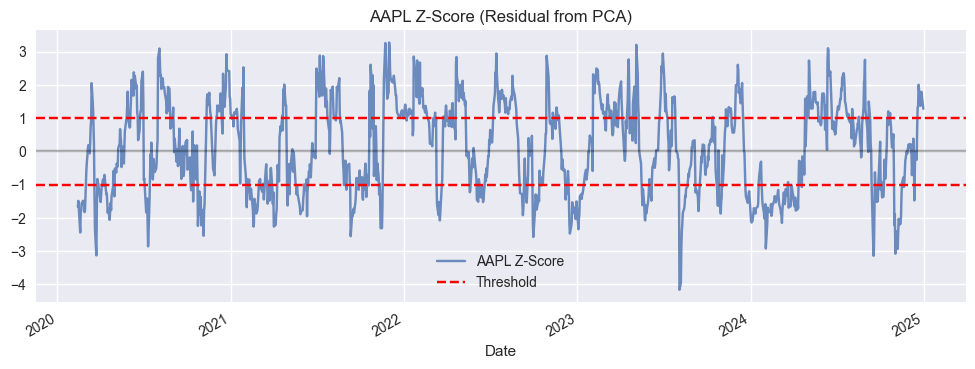

In [38]:
# Step 6: Visualize Z-Scores and Positions
# Plot z-scores for one stock as example
plt.figure(figsize=(12, 4))
z_scores['AAPL'].plot(label='AAPL Z-Score', alpha=0.8)
plt.axhline(1.0, color='r', linestyle='--', label='Threshold')
plt.axhline(-1.0, color='r', linestyle='--')
plt.axhline(0, color='k', alpha=0.3)
plt.title('AAPL Z-Score (Residual from PCA)')
plt.legend()
plt.grid(True)
plt.show()